<a href="https://colab.research.google.com/github/Ekaterina-Meshkova/BH_HWs/blob/main/HW5_v2_Rgs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
# 1. Импорт необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Для воспроизводимости
RANDOM_STATE = 42

In [97]:
# 2 Загрузка предварительно подгруженного из kaggle.com датасета household_power_consumption
path = 'household_power_consumption_upd.csv'
data = pd.read_csv (path, sep=';')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

<ipython-input-97-5877d8705d12>:4: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [98]:
# 3 Просмотр анализ и предварительная обработка данных
# Вывод первых 5 строк датасета и информации по нему
print('--- Первые 5 строк ---')
print(data.head())
print('--- Info ---')
print(data.info())

--- Первые 5 строк ---
                Time Global_active_power Global_reactive_power  Voltage  \
Date                                                                      
2006-12-16  17:24:00               4.216                 0.418  234.840   
2006-12-16  17:25:00               5.360                 0.436  233.630   
2006-12-16  17:26:00               5.374                 0.498  233.290   
2006-12-16  17:27:00               5.388                 0.502  233.740   
2006-12-16  17:28:00               3.666                 0.528  235.680   

           Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
Date                                                                       
2006-12-16           18.400          0.000          1.000            17.0  
2006-12-16           23.000          0.000          1.000            16.0  
2006-12-16           23.000          0.000          2.000            17.0  
2006-12-16           23.000          0.000          1.000            17

Информация об атрибутах:
1.date: дата в формате дд/мм/гггг

2.time: время в формате чч:мм:сс

3.global_active_power: глобальная усредненная за минуту активная мощность домохозяйства (в киловаттах)

4.global_reactive_power: глобальная усредненная за минуту реактивная мощность домохозяйства (в киловаттах)

5.voltage: усредненное за минуту напряжение (в вольтах)

6.global_intensity: глобальная усредненная за минуту интенсивность тока домохозяйства (в амперах)

7.sub_metering_1: подсчет энергии № 1 (в ватт-часах активной энергии). Он соответствует кухне, содержащей в основном посудомоечную машину, духовку и микроволновую печь (плиты не электрические, а газовые).

8.sub_metering_2: подсчет энергии № 2 (в ватт-часах активной энергии). Он соответствует прачечной, содержащей стиральную машину, сушилку для белья, холодильник и свет.

9.sub_metering_3: подсчет энергии № 3 (в ватт-часах активной энергии). Он соответствует электрическому водонагревателю и кондиционеру.

In [99]:
# Проверка датасета на пропущенные значения
print ('Пропущенные значения до обработки:')
print (data.isnull().sum())

Пропущенные значения до обработки:
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           4
dtype: int64


In [100]:
# Заполнение пропущенных значений (числовые заполняем средним значением, категориальные - модой)
for col in data:
  data[col] = data[col].fillna(data[col].mean() if data[col].dtype in ['int64', 'float64'] else data[col].mode()[0])


In [101]:
# Проверка на пропущенные значения после из обработки
print ('Пропущенные значения после обработки:')
print (data.isnull().sum())

Пропущенные значения после обработки:
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


In [102]:
# Кодирование категориальных признаков
label_encoders = {}
categorical_cols = ['Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']
for col in categorical_cols:
  le = LabelEncoder()
  data[col] = le.fit_transform(data[col].astype(str))
  label_encoders[col] = le

In [103]:
# Проверка результата преобразования данных
print('--- Info ---')
print(data.info())

--- Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21996 entries, 2006-12-16 to 2006-12-31
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Time                   21996 non-null  int64  
 1   Global_active_power    21996 non-null  int64  
 2   Global_reactive_power  21996 non-null  int64  
 3   Voltage                21996 non-null  int64  
 4   Global_intensity       21996 non-null  int64  
 5   Sub_metering_1         21996 non-null  int64  
 6   Sub_metering_2         21996 non-null  int64  
 7   Sub_metering_3         21996 non-null  float64
dtypes: float64(1), int64(7)
memory usage: 1.5 MB
None


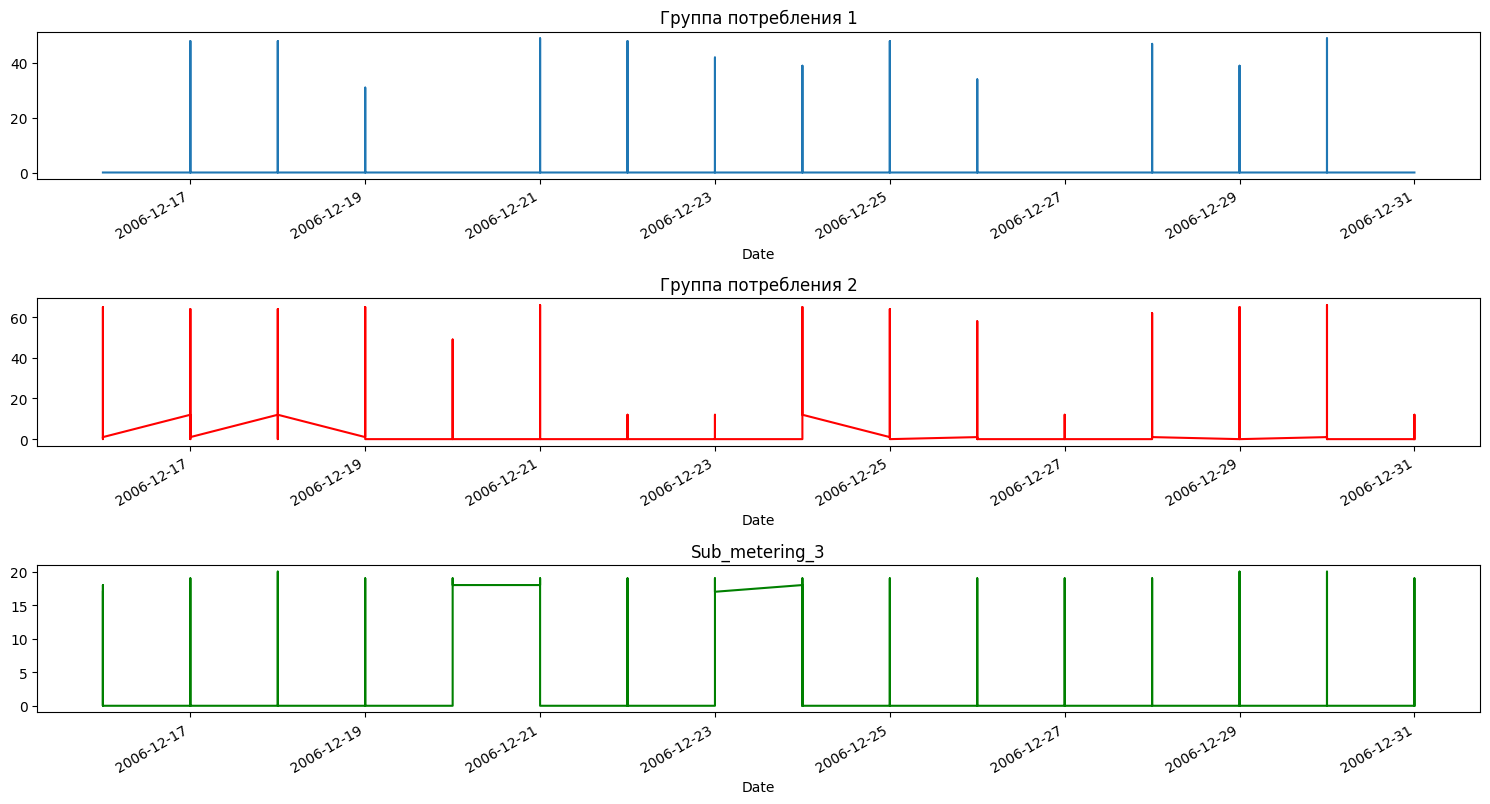

In [104]:
# Визуализация исходных данных
plt.figure(figsize=(15, 10))
plt.subplot(4, 1, 1)
data['Sub_metering_1'].plot(title='Группа потребления 1')
plt.subplot(4, 1, 2)
data['Sub_metering_2'].plot(title='Группа потребления 2', color='r')
plt.subplot(4, 1, 3)
data['Sub_metering_3'].plot(title='Sub_metering_3', color='g')
plt.tight_layout()
plt.show()

In [106]:
# Разделение данные на признаки (X) и целевую переменную (y)
X = data.drop('Global_intensity', axis=1)
y = data['Global_intensity'].astype(int)

In [107]:
#  Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.5 MB/s eta 0:00:00


In [110]:
# 4 Выбор и подготовка алгоритмов регрессионного анализа

models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    "Linear Regression": LinearRegression(),
    "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    "Dummy": DummyRegressor(strategy="mean")  # Базовая модель
}

# Тестирование моделей
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append((name, mae, mse, rmse, r2))

# Вывод результатов
dt_results = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R²"])
print(dt_results)

                Model        MAE          MSE       RMSE        R²
0       Random Forest   7.224185   285.536639  16.897829  0.938194
1   Linear Regression  59.851266  4348.803984  65.945462  0.058683
2         Elastic Net  59.854885  4348.851337  65.945821  0.058673
3       Decision Tree   7.757993   345.803655  18.595797  0.925149
4  AdaBoost Regressor  13.269313   466.045267  21.588082  0.899123
5                 KNN   4.752636   299.345673  17.301609  0.935205
6   Gradient Boosting   3.921865   174.511764  13.210290  0.962226
7               Dummy  62.926956  4621.664680  67.982826 -0.000379


*** Random Forest ***
MAE: 7.2242
MSE: 285.5366
RMSE: 16.8978
R²: 0.9382


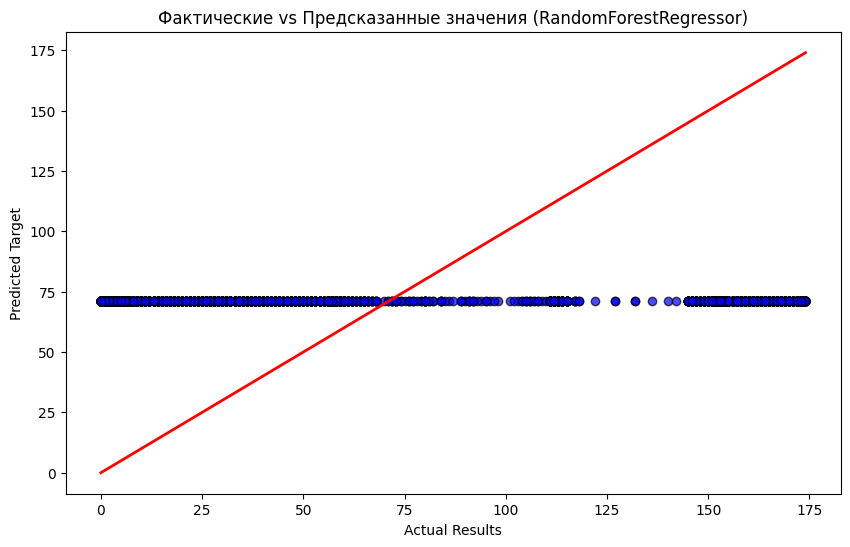

In [121]:
# 4.1 Обучение Random Forest (100 деревьев)

# Обучение модели
model_rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print(f'*** Random Forest ***')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# График сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue',edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel("Actual Results")
plt.ylabel("Predicted Target")
plt.title("Фактические vs Предсказанные значения (RandomForestRegressor)")
plt.show()

*** Linear Regression ***
MAE: 62.9270
MSE: 4621.6647
RMSE: 67.9828
R²: -0.0004


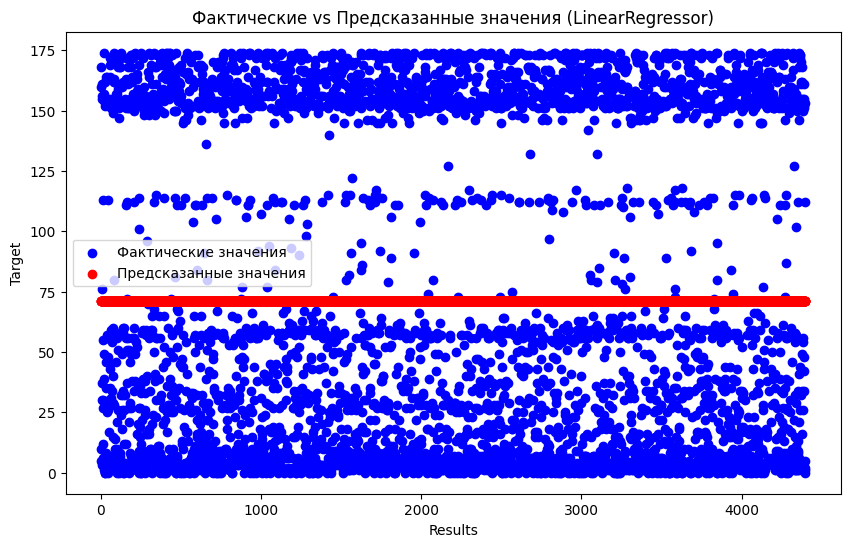

In [119]:
# 4.2 Визуализация Linear Regression

# Обучение модели
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*** Linear Regression ***')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# График сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Results')
plt.ylabel('Target')
plt.title('Фактические vs Предсказанные значения (LinearRegressor)')
plt.legend()
plt.show()

*** Elastic Net ***
MAE: 59.8549
MSE: 4348.8513
RMSE: 65.9458
R²: 0.0587


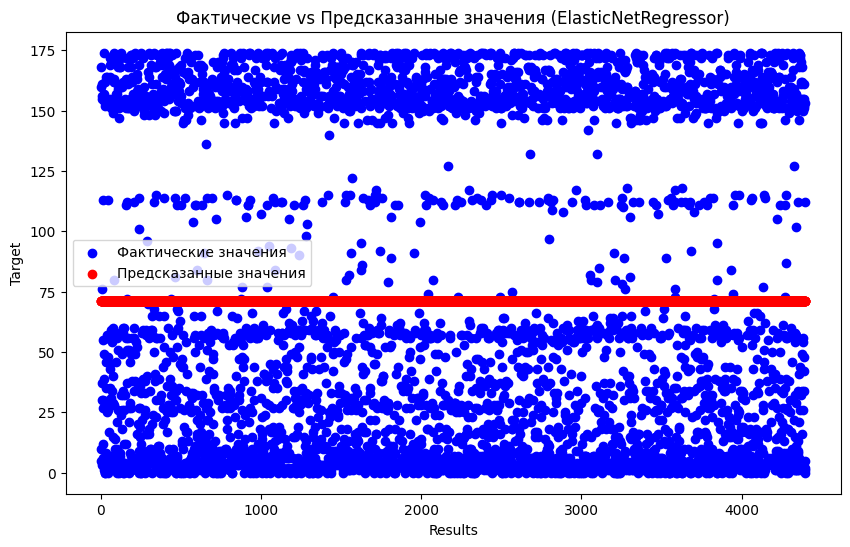

In [123]:
# 4.3 Визуализация ElasticNet

# Обучение модели
model_elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
model_elastic.fit(X_train, y_train)
y_pred_elastic = model_elastic.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_elastic)
mse = mean_squared_error(y_test, y_pred_elastic)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_elastic)

print(f'*** Elastic Net ***')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# График сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Results')
plt.ylabel('Target')
plt.title('Фактические vs Предсказанные значения (ElasticNetRegressor)')
plt.legend()
plt.show()

*** Decision Tree Regressor ***
MAE: 62.9270
MSE: 4621.6647
RMSE: 67.9828
R²: -0.0004


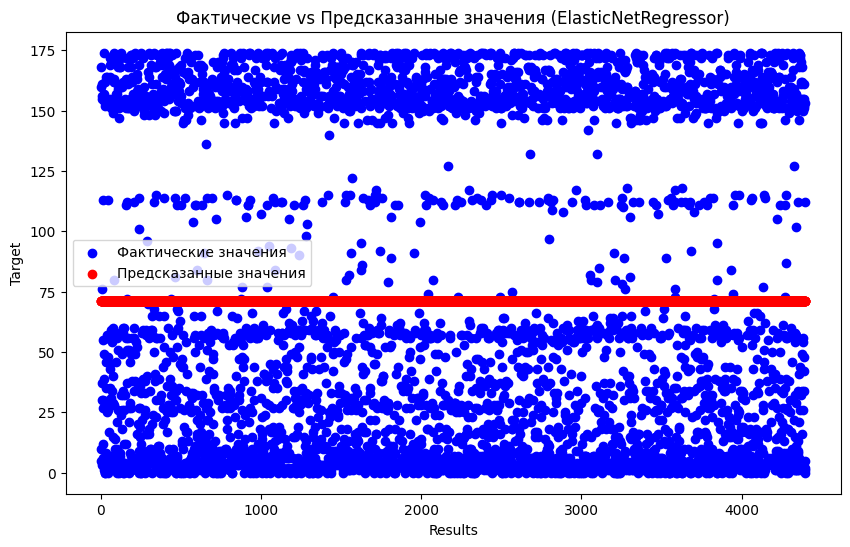

In [127]:
# 4.4 Визуализация Decision Tree Regressor

# Обучение модели
model_tree = DecisionTreeRegressor(max_depth=5, random_state=42)
model_tree.fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'*** Decision Tree Regressor ***')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# График сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Results')
plt.ylabel('Target')
plt.title('Фактические vs Предсказанные значения (ElasticNetRegressor)')
plt.legend()
plt.show()

*** Ada Boost Regressor ***
MAE: 14.7046
Mean Squared Error (MSE): 517.80
R-squared (R^2): -0.00


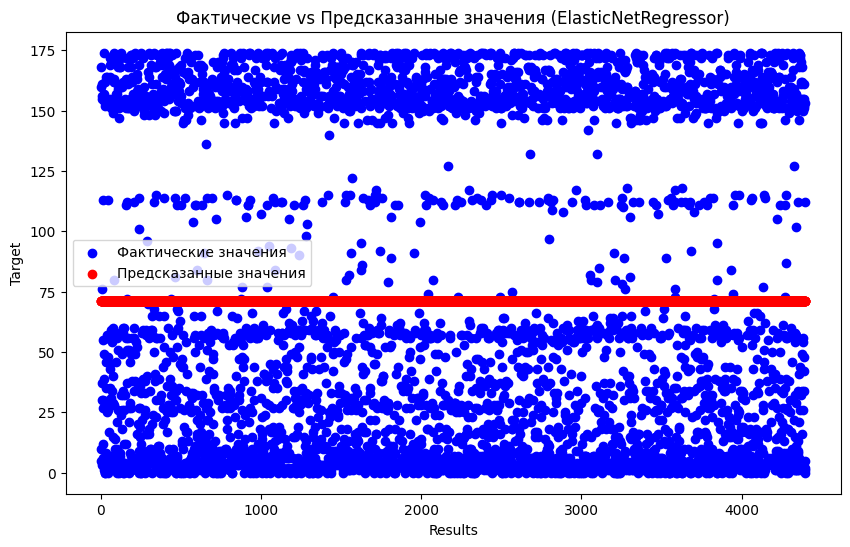

In [128]:
# 4.5 AdaBoostRegressor регрессор

# Обучение модели
model_ada = AdaBoostRegressor(n_estimators=100, random_state=42)
model_ada.fit(X_train, y_train)
y_pred_ada = model_ada.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_ada)
mse = mean_squared_error(y_test, y_pred_ada)
r2 = r2_score(y_test, y_pred)

print(f'*** Ada Boost Regressor ***')
print(f'MAE: {mae:.4f}')
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

# График сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Results')
plt.ylabel('Target')
plt.title('Фактические vs Предсказанные значения (ElasticNetRegressor)')
plt.legend()
plt.show()

*** K-Nearest Neighbors ***
MAE: 4.7526
MSE: 299.3457
RMSE: 17.3016
R²: 0.9352


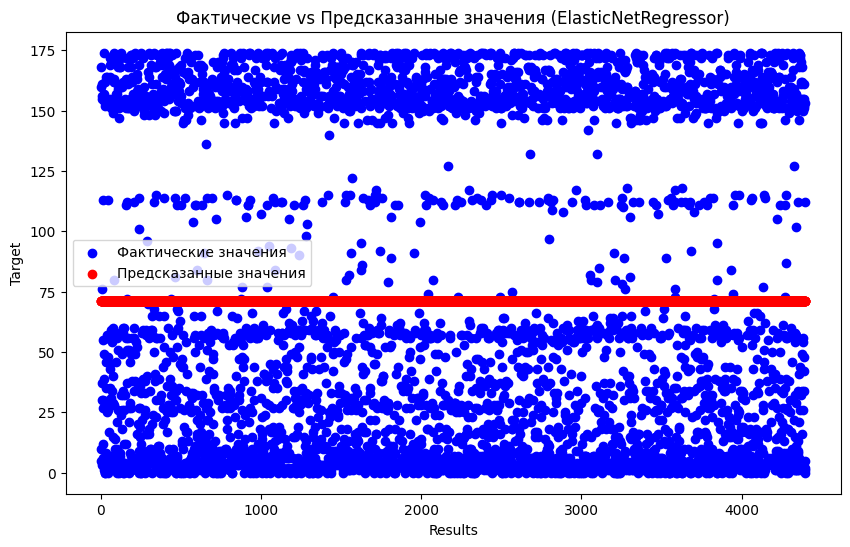

In [130]:
# 4.6 Визуализация KNeighbors Regressor

# Обучение модели KNN (количество соседей = 5)
model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_knn)

print(f'*** K-Nearest Neighbors ***')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# График сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Results')
plt.ylabel('Target')
plt.title('Фактические vs Предсказанные значения (ElasticNetRegressor)')
plt.legend()
plt.show()

*** Gradient Boosting ***
MAE: 3.9219
MSE: 174.5118
RMSE: 13.2103
R²: 0.9622


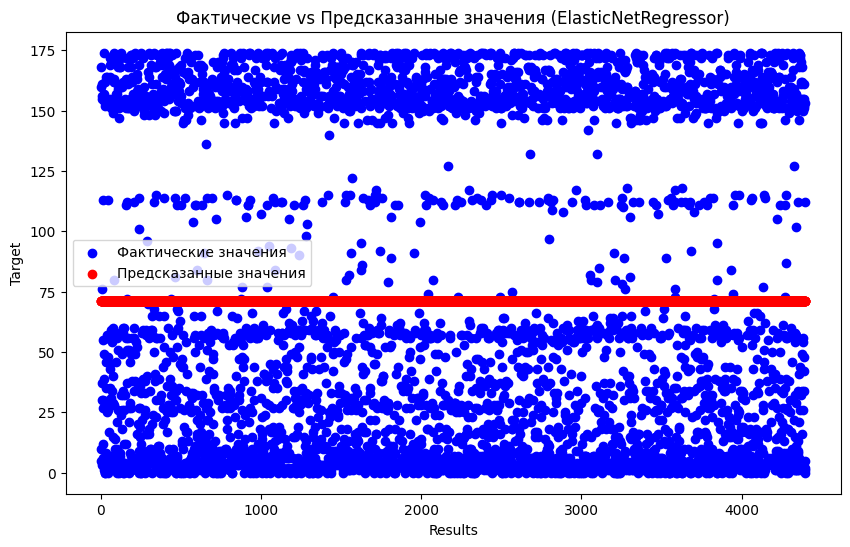

In [132]:
# 7 Визуализация Gradient Boosting Regressor

# Обучение модели
model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_gb)

print(f'*** Gradient Boosting ***')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# График сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Results')
plt.ylabel('Target')
plt.title('Фактические vs Предсказанные значения (ElasticNetRegressor)')
plt.legend()
plt.show()

*** Dummy Regressor ***
MAE: 62.9270
MSE: 4621.6647
RMSE: 67.9828
R²: -0.0004


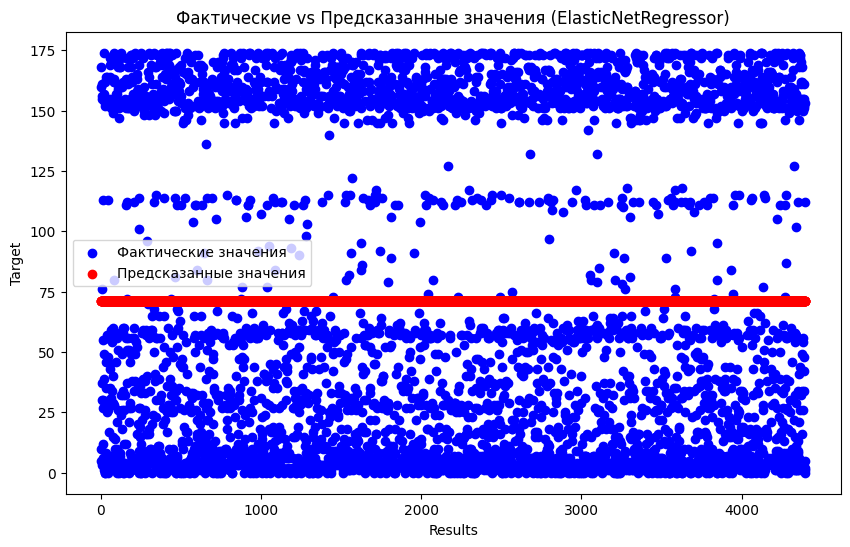

In [134]:
# 8 Визуализация DummyRegressor

# Обучение модели
model_dummy = DummyRegressor(strategy="mean")
model_dummy.fit(X_train, y_train)
y_pred_dummy = model_dummy.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_dummy)
mse = mean_squared_error(y_test, y_pred_dummy)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_dummy)

print(f'*** Dummy Regressor ***')
print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'RMSE: {rmse:.4f}')
print(f'R²: {r2:.4f}')

# График сравнения фактических и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(y_test)), y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Results')
plt.ylabel('Target')
plt.title('Фактические vs Предсказанные значения (ElasticNetRegressor)')
plt.legend()
plt.show()

In [135]:
# 5.1 Графика результатов предсказаний моделями
import plotly.graph_objects as go

# Названия моделей и их предсказания
models = {
    "Random Forest": y_pred_rf,
    "Linear Regression": y_pred_linear,
    "Elastic Net": y_pred_elastic,
    "Decision Tree": y_pred_tree,
    "AdaBoost": y_pred_ada,
    "KNN": y_pred_knn,
    "Gradient Boosting": y_pred_gb,
    "Dummy": y_pred_dummy
}

# Фактические значения
y_actual = y_test

# Уменьшение размера данных для сравнения
subset_size = 50
y_actual_subset = y_actual[:subset_size]
models_subset = {name: predictions[:subset_size] for name, predictions in models.items()}

# Создание интерактивного графика
fig = go.Figure()

for name, predictions in models_subset.items():
    fig.add_trace(go.Scatter(
        x=list(range(len(y_actual_subset))),
        y=predictions,
        mode='lines',
        name=name
    ))

# Визуализация сравнения эффективности предсказаний
fig.add_trace(go.Scatter(
    x=list(range(len(y_actual_subset))),
    y=y_actual_subset,
    mode='markers',
    name='Actual Values',
    marker=dict(color='black')
))

fig.update_layout(
    title="Сравнение предсказаний разных регрессоров (50 наблюдений)",
    xaxis_title="Results",
    yaxis_title="Target",
    legend_title="Модели"
)

fig.show()


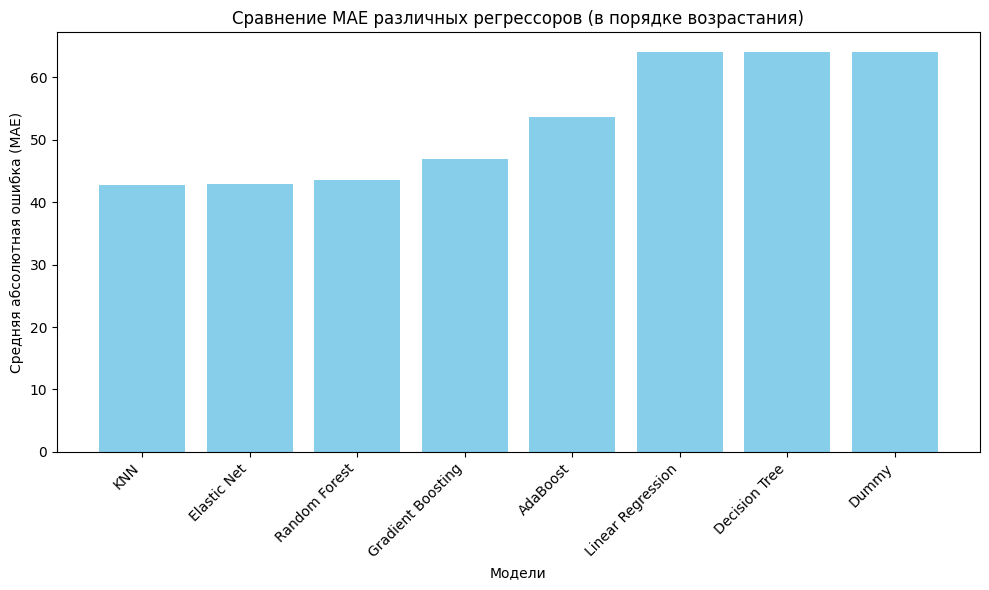

In [136]:
# 5.2 Сравнение в виде столбчатой диаграммы для MAE

# Метрики (пример значений MAE для каждой модели)
model_names = ["Random Forest", "Linear Regression", "Elastic Net", "Decision Tree", "AdaBoost", "KNN", "Gradient Boosting", "Dummy"]
mae_values = [43.6095, 64.0065, 42.8733, 64.0065, 53.5665, 42.7775, 46.9288, 64.0065]  # Замените на ваши реальные значения MAE

# Сортировка моделей по возрастанию MAE
sorted_indices = np.argsort(mae_values)
model_names_sorted = [model_names[i] for i in sorted_indices]
mae_values_sorted = [mae_values[i] for i in sorted_indices]

# Визуализация сравнения эффективности предсказаний
plt.figure(figsize=(10, 6))
plt.bar(model_names_sorted, mae_values_sorted, color='skyblue')
plt.xlabel("Модели")
plt.ylabel("Средняя абсолютная ошибка (MAE)")
plt.title("Сравнение MAE различных регрессоров (в порядке возрастания)")
plt.xticks(rotation=45, ha='right')  # Поворот подписей для удобства чтения
plt.tight_layout()
plt.show()
